# Perform EVI Analysis

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [48]:
# Read the image
# Change the working directory
#os.chdir('D:/dl_data/kenya_after')
with rio.open('D:/dl_data/kenya_before/kenya_aoi_before (46).tif') as src:
    data_before = src.read()

with rio.open('D:/dl_data/kenya_after/kenya_aoi_after (46).tif') as src:
    data_after = src.read()

## Calculating the NDVI
We'll be calculating the NDVI for the before and after image.

In [49]:
# Calculate the NDVI 
ndvi_before = es.normalized_diff(data_before[8], data_before[4])
ndvi_after = es.normalized_diff(data_after[8], data_after[4])

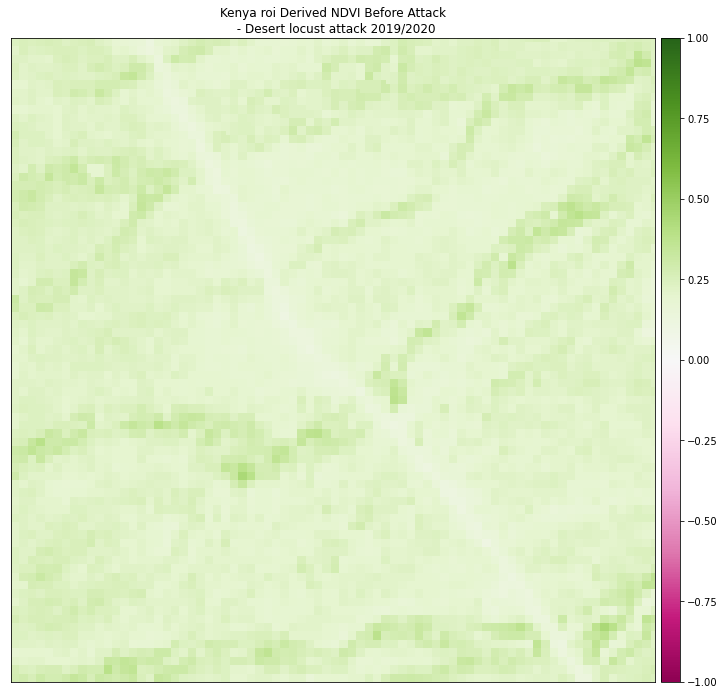

In [50]:
ep.plot_bands(ndvi_before, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Kenya roi Derived NDVI Before Attack\n  - Desert locust attack 2019/2020")
plt.show()

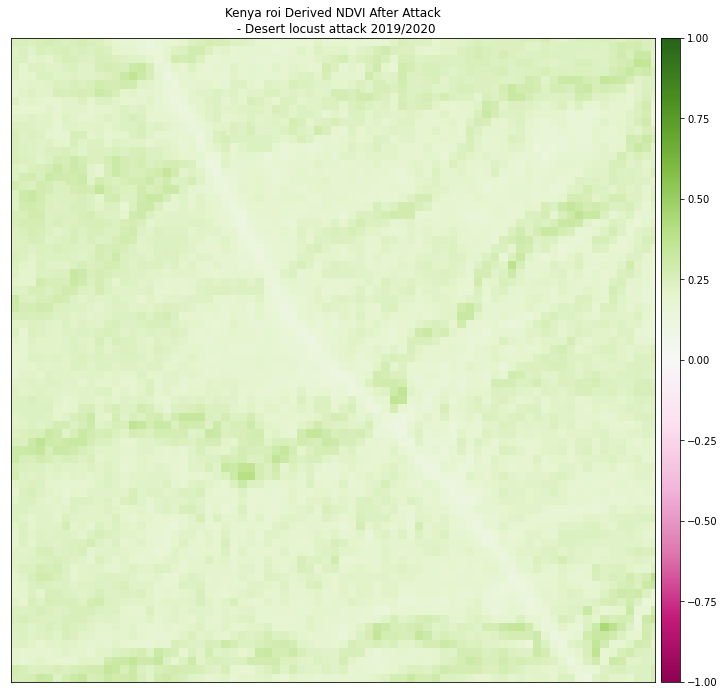

In [51]:
ep.plot_bands(ndvi_after, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Kenya roi Derived NDVI After Attack\n  - Desert locust attack 2019/2020")
plt.show()

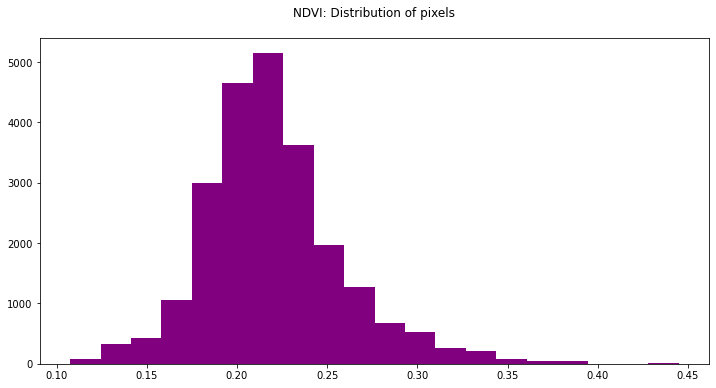

In [52]:
ep.hist(ndvi_before,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n"])

plt.show()

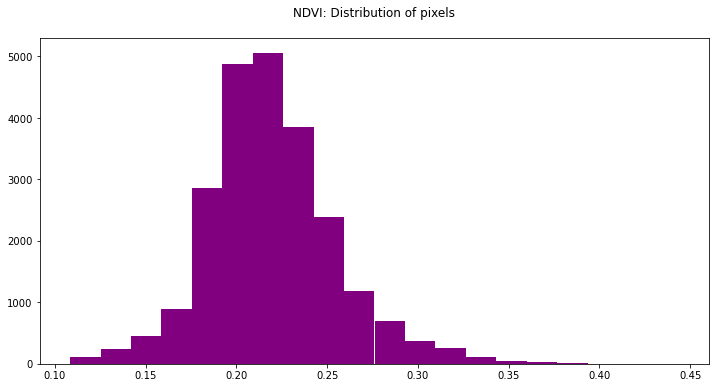

In [53]:
ep.hist(ndvi_after,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n"])

plt.show()

## Calculating the EVI
We'll be calculating the EVI for the before and after image.

In [54]:
np.seterr(divide='ignore', invalid='ignore')
# # Calculate the EVI for the source image (before/after)
evi_before = 2.5 * (data_before[8] - data_before[4]) / ((data_before[8] + 6 * data_before[4] - 7.5 * data_before[2]) + 1)

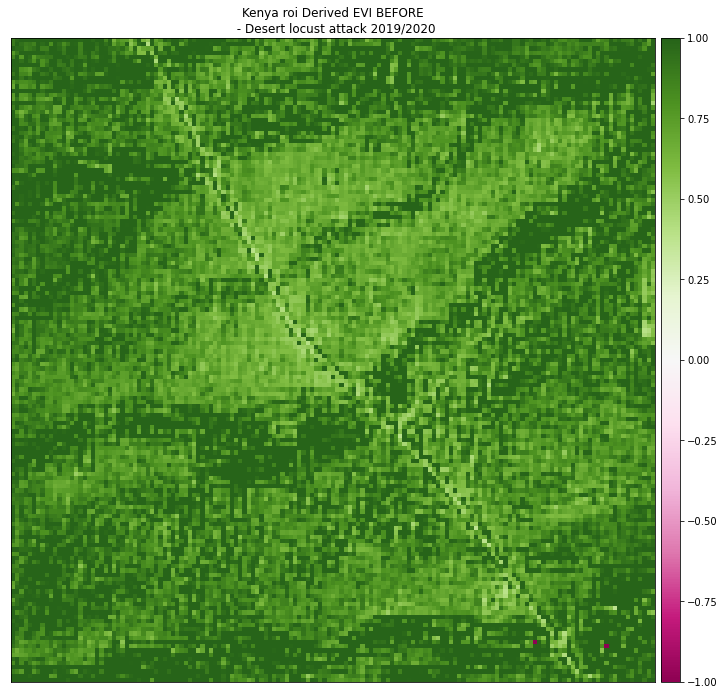

In [55]:
ep.plot_bands(evi_before, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Kenya roi Derived EVI BEFORE\n  - Desert locust attack 2019/2020")
plt.show()

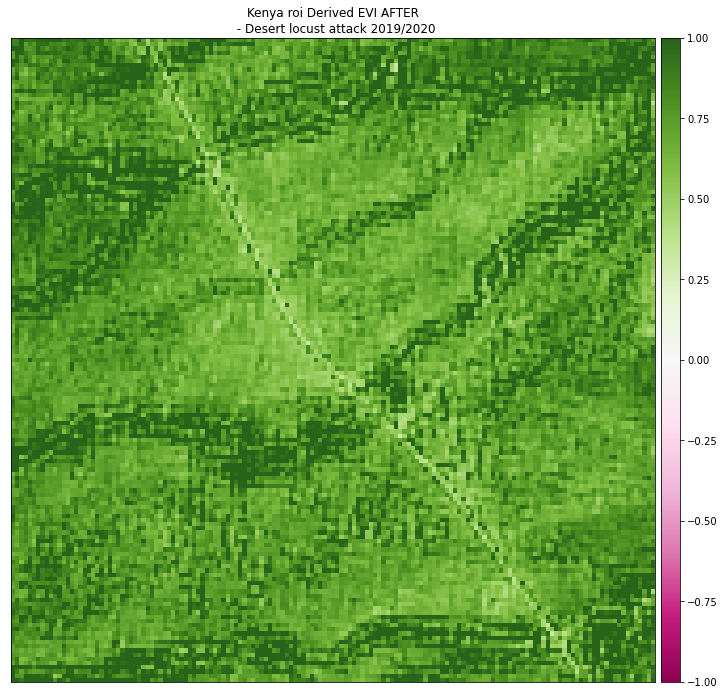

In [56]:
#EVI
evi_after = 2.5 * (data_after[8] - data_after[4]) / ((data_after[8] + 6 * data_after[4] - 7.5 * data_after[2]) + 1)
ep.plot_bands(evi_after, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Kenya roi Derived EVI AFTER\n  - Desert locust attack 2019/2020")
plt.show()

In [57]:
EVI_diff = evi_before - evi_after

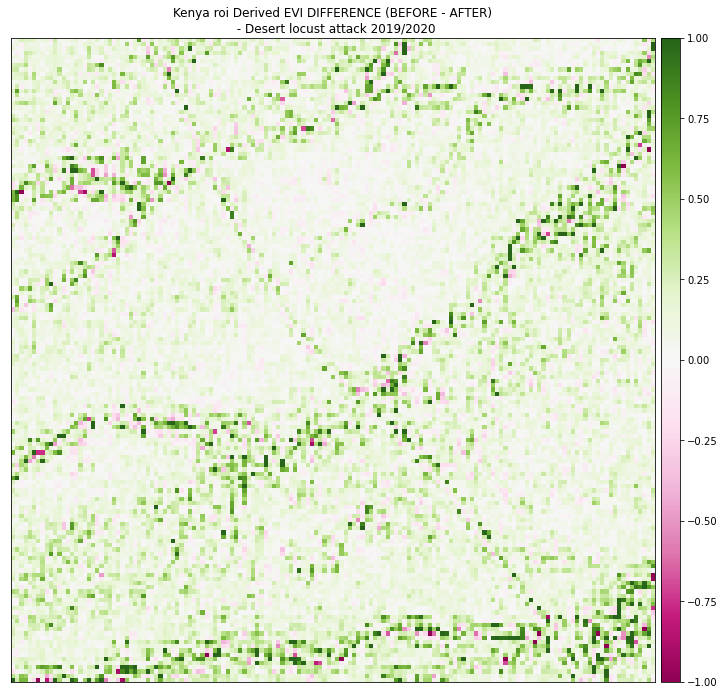

In [58]:

ep.plot_bands(EVI_diff, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Kenya roi Derived EVI DIFFERENCE (BEFORE - AFTER)\n  - Desert locust attack 2019/2020")
plt.show()

In [59]:
affected_pixels = 0
no_change = 0
more_vegetation = 0
for i in range(EVI_diff.shape[0]):
    for j in range(EVI_diff.shape[0]):
        if EVI_diff[i][j] > 0.01:
            affected_pixels += 1
        elif EVI_diff[i][j] < 0.01 and EVI_diff[i][j] >-0.01:
            no_change +=1
        else:
            more_vegetation +=1
            
            
        

In [60]:
affected_pixels

18815

In [61]:
no_change

1185

In [62]:
more_vegetation

3409

In [63]:
affected_pixels + more_vegetation

22224

In [64]:
area_affected = affected_pixels * 100

In [65]:
area_affected

1881500